# Oil production prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
# 1 эквивалент тонны нефти = 11630 киловатт-час
# Запасы нефти на земле = 244,6 млрд т
# Тераватт-час (TWh) = 10**9 киловатт-час

## Обработка датасета

In [4]:
df = pd.read_csv('oil-production-by-country.csv')
df

,Entity,Code,Year,Oil production (TWh)
0,Afghanistan,AFG,1980,0.0
1,Afghanistan,AFG,1981,0.0
2,Afghanistan,AFG,1982,0.0
3,Afghanistan,AFG,1983,0.0
4,Afghanistan,AFG,1984,0.0
...,...,...,...,...
17477,Zimbabwe,ZWE,2012,0.0
17478,Zimbabwe,ZWE,2013,0.0
17479,Zimbabwe,ZWE,2014,0.0
17480,Zimbabwe,ZWE,2015,0.0


In [5]:
data = df.groupby('Year')['Oil production (TWh)'].sum()

In [ ]:
data

,Oil production (TWh)
Year,
1900,1295.896005
1901,1447.446553
1902,1595.031260
1903,1718.809328
1904,1941.965770
...,...
2019,364136.778457
2020,339843.292655
2021,343922.349486


In [6]:
data = data.apply(lambda x: round(x))

In [7]:
x = data.index.values.reshape(-1, 1)

In [8]:
y = data.values.reshape(-1, 1)

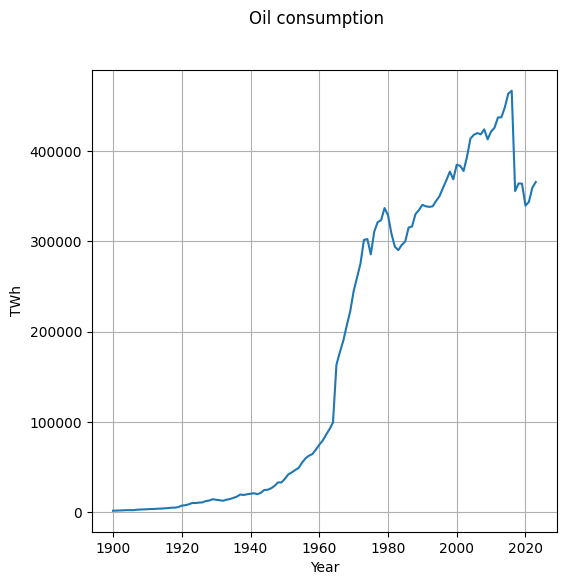

In [9]:
# Построение графика потребление нефти за прошедшие года
fig = plt.figure(figsize=(6,6))
fig.suptitle('Oil consumption')
ax = fig.add_subplot(111)
ax.set_xlabel('Year')
ax.set_ylabel('TWh')
ax.grid()
ax.plot(x, y);

## Создание предсказаний

### Предсказание 1

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)

In [11]:
model1 = LinearRegression()

In [12]:
model1.fit(x_train, y_train)

LinearRegression()

In [13]:
x_new = np.arange(2024, 2101).reshape(-1, 1)

In [14]:
yp = model1.predict(x_new)

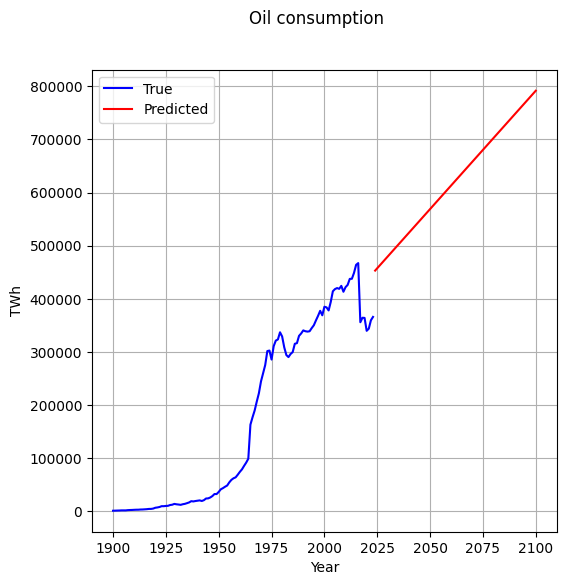

In [15]:
# Построение 1 предсказания на графике
fig = plt.figure(figsize=(6,6))
fig.suptitle('Oil consumption')
ax = fig.add_subplot(111)
ax.set_xlabel('Year')
ax.set_ylabel('TWh')
ax.plot(x, y, 'b', label='True')
ax.plot(x_new, yp, 'r', label='Predicted')
ax.grid()
ax.legend();

### Предсказание 2

Пробуем обучить модель на данных после 1995, так как во время распада
различных государств добыча исчезнувшего гос-ва и нового, появившегося вместо
его, считаются дважды, что делает данные недостоверными в некоторые года.

In [16]:
data2 = data[data.index.values >= 1995]

In [17]:
x2 = data2.index.values.reshape(-1, 1)

In [18]:
y2 = data2.values.reshape(-1, 1)

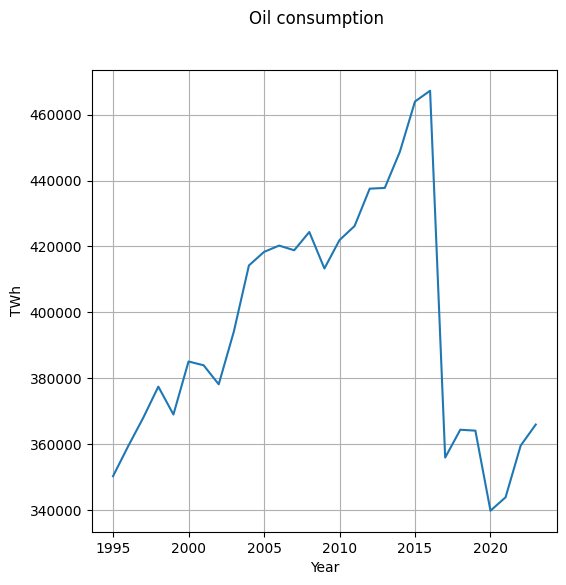

In [19]:
# График потребления с 1995 по 2023 года
fig = plt.figure(figsize=(6,6))
fig.suptitle('Oil consumption')
ax = fig.add_subplot(111)
ax.set_xlabel('Year')
ax.set_ylabel('TWh')
ax.grid()
ax.plot(x2, y2);

In [20]:
# Построение второй модели линейной регрессии для предсказания
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2,
                                                    random_state=42)
model2 = LinearRegression()
model2.fit(x_train, y_train)
yp2 = model2.predict(x_new)

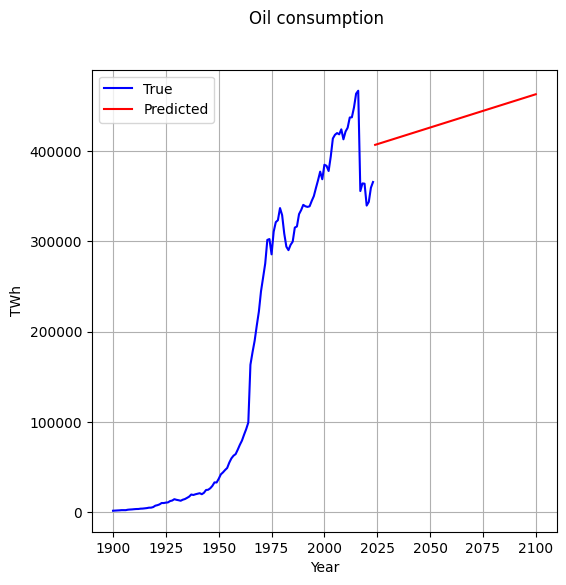

In [21]:
# Построение второго предсказания на графике
fig = plt.figure(figsize=(6,6))
fig.suptitle('Oil consumption')
ax = fig.add_subplot(111)
ax.set_xlabel('Year')
ax.set_ylabel('TWh')
ax.plot(x, y, 'b', label='True')
ax.plot(x_new, yp2, 'r', label='Predicted')
ax.grid()
ax.legend();

### Предсказание 3

Используем аппроксимацию полиномами для третьего предсказания

In [22]:
x = x.reshape(1, -1)[0]
y = y.reshape(1, -1)[0]

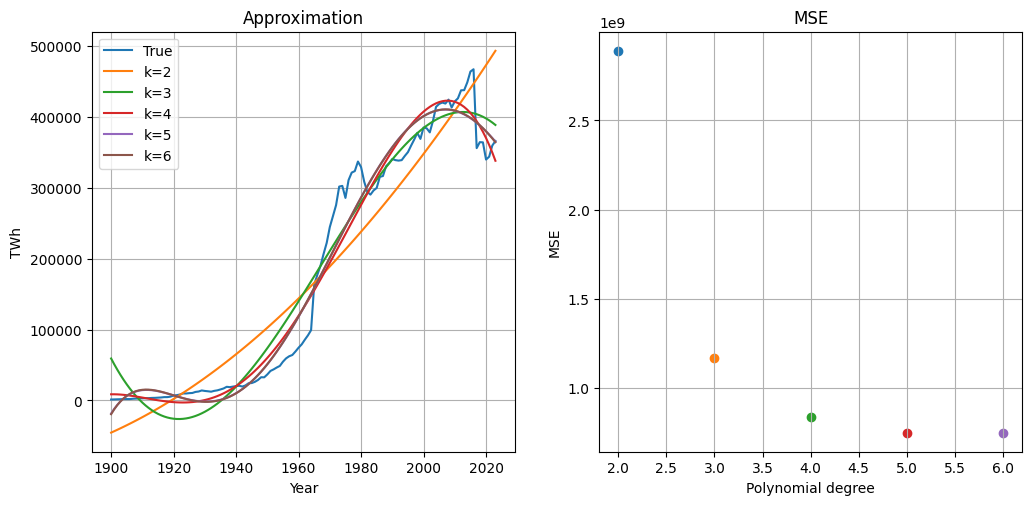

In [23]:
# Выбираем оптимальный коэффициент k
fig = plt.figure(figsize=(12, 12))
t1 = fig.add_subplot(221)
t1.set_title('Approximation')
t1.set_xlabel('Year')
t1.set_ylabel('TWh')
t1.plot(x, y, label='True')
t1.grid()

t2 = fig.add_subplot(222)
t2.set_title('MSE')
t2.set_xlabel('Polynomial degree')
t2.set_ylabel('MSE')
t2.grid()
for k in range(2, 7):
    p = np.polyfit(x, y, k)
    py = np.polyval(p, x)
    mse = mean_squared_error(py, y)
    t1.plot(x, py, label=f'k={k}')
    t2.scatter(k, mse)
t1.legend()

In [24]:
# 5 степень полинома наиболее оптимальная

In [25]:
# находим коэффициенты полинома и строим предсказание
p = np.polyfit(x, y, 5)
py = np.polyval(p, x_new)

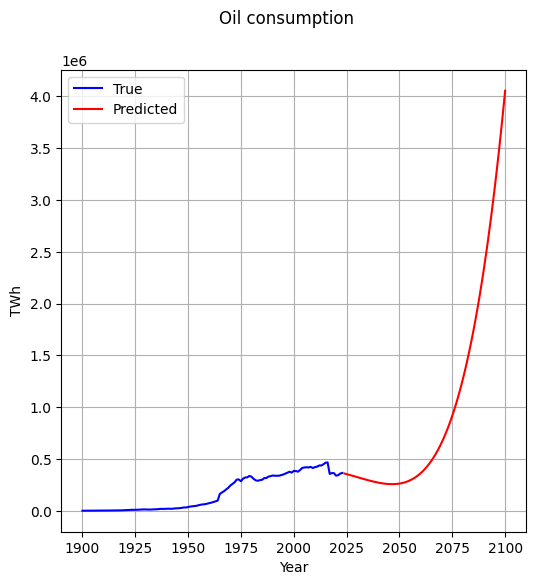

In [26]:
# Построение третьего предсказания на графике
fig = plt.figure(figsize=(6,6))
fig.suptitle('Oil consumption')
ax = fig.add_subplot(111)
ax.set_xlabel('Year')
ax.set_ylabel('TWh')
ax.plot(x, y, 'b', label='True')
ax.plot(x_new, py, 'r', label='Predicted')
ax.grid()
ax.legend();

### Предсказание 4

Используем все ту же аппроксимацию, но на данных после 1995 года

In [27]:
x_new1 = np.arange(2023, 2040)

In [28]:
x2 = x2.reshape(1, -1)[0]

In [29]:
y2 = y2.reshape(1, -1)[0]

In [30]:
p2 = np.polyfit(x2, y2, 5)
py2 = np.polyval(p2, x_new1)

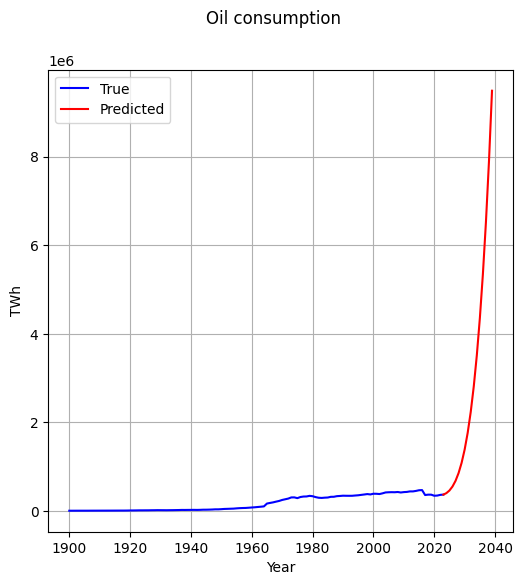

In [31]:
fig = plt.figure(figsize=(6,6))
fig.suptitle('Oil consumption')
ax = fig.add_subplot(111)
ax.set_xlabel('Year')
ax.set_ylabel('TWh')
ax.plot(x, y, 'b', label='True')
ax.plot(x_new1, py2, 'r', label='Predicted')
ax.grid()
ax.legend();

Этот прогноз будем считать недействительным из-за слишком резкой прямой.
Тогда оставшиеся три прогноза будем считать за благоприятный, нормальный и
неблагоприятный.

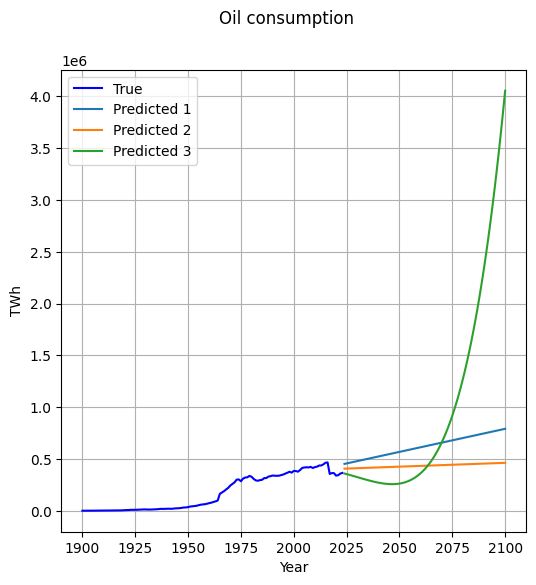

In [32]:
# Строим все три прогноза на графике
fig = plt.figure(figsize=(6,6))
fig.suptitle('Oil consumption')
ax = fig.add_subplot(111)
ax.set_xlabel('Year')
ax.set_ylabel('TWh')
ax.plot(x, y, 'b', label='True')
ax.plot(x_new, yp, label='Predicted 1')
ax.plot(x_new, yp2, label='Predicted 2')
ax.plot(x_new, py, label='Predicted 3')
ax.grid()
ax.legend();

## Расчет оставшихся ресурсов

Справочные данные:

- 1 эквивалент тонны нефти = 11630 киловатт-час
- Запасы нефти на земле = 244,6 млрд т
- Тераватт-час (TWh) = 10**9 киловатт-час

In [33]:
# 1 эквивалент тонны нефти = 11630 киловатт-час
# Запасы нефти на земле = 244,6 млрд т
# Тераватт-час (TWh) = 10**9 киловатт-час

In [34]:
res = 244.6e9

### Предсказание 1

In [35]:
# Создаем массив r_1 будет содержать в себе остаток нефти на земле в
# соответствии с предсказанием
res_1 = yp * 1e9 / 116305
r_1 = np.array([res])
for i in res_1:
    r_1 = np.append(r_1, r_1[-1] - i)
r_1 = r_1[r_1 > 0]
r_1 = np.append(r_1, 0)

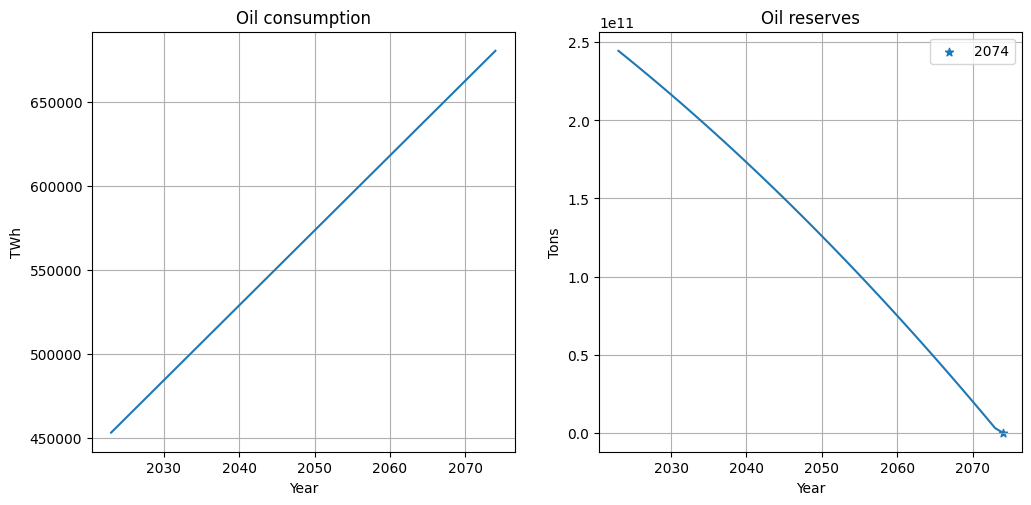

In [36]:
# Построение графика потребления и графика запасов нефти на земле
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(221)
ax1.set_title('Oil consumption')
ax1.set_xlabel('Year')
ax1.set_ylabel('TWh')
ax1.grid()
ax1.plot(np.arange(2023, 2023 + len(r_1)), yp[:len(r_1)])

ax = fig.add_subplot(222)
ax.set_title('Oil reserves')
ax.set_xlabel('Year')
ax.set_ylabel('Tons')
ax.plot(np.arange(2023, 2023 + len(r_1)), r_1)
ax.scatter(2023 + len(r_1) - 1, 0, label=2023 + len(r_1) - 1, marker='*')
ax.grid()
ax.legend();

### Предсказание 2

In [37]:
# Создаем массив r_2 будет содержать в себе остаток нефти на земле в
# соответствии с предсказанием
res_2 = yp2 * 1e9 / 116305
r_2 = np.array([res])
for i in res_2:
    r_2 = np.append(r_2, r_2[-1] - i)
r_2 = r_2[r_2 > 0]
r_2 = np.append(r_2, 0)

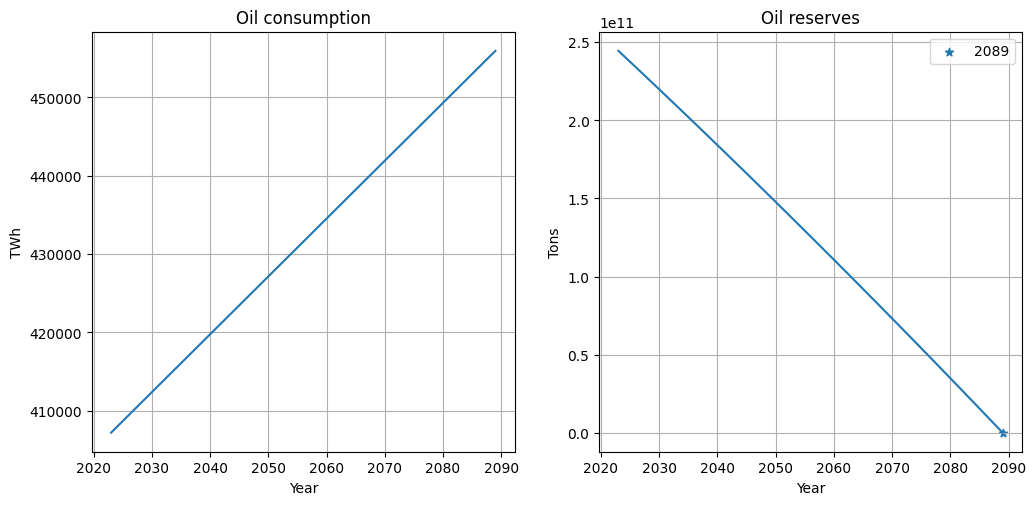

In [38]:
# Построение графика потребления и графика запасов нефти на земле
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(221)
ax1.set_title('Oil consumption')
ax1.set_xlabel('Year')
ax1.set_ylabel('TWh')
ax1.grid()
ax1.plot(np.arange(2023, 2023 + len(r_2)), yp2[:len(r_2)])

ax = fig.add_subplot(222)
ax.set_title('Oil reserves')
ax.set_xlabel('Year')
ax.set_ylabel('Tons')
ax.plot(np.arange(2023, 2023 + len(r_2)), r_2)
ax.scatter(2023 + len(r_2) - 1, 0, label=2023 + len(r_2) - 1, marker='*')
ax.grid()
ax.legend();

### Предсказание 3

In [39]:
# Создаем массив r_3 будет содержать в себе остаток нефти на земле в
# соответствии с предсказанием
res_3 = py * 1e9 / 116305
r_3 = np.array([res])
for i in res_3:
    r_3 = np.append(r_3, r_3[-1] - i)
r_3 = r_3[r_3 > 0]
r_3 = np.append(r_3, 0)

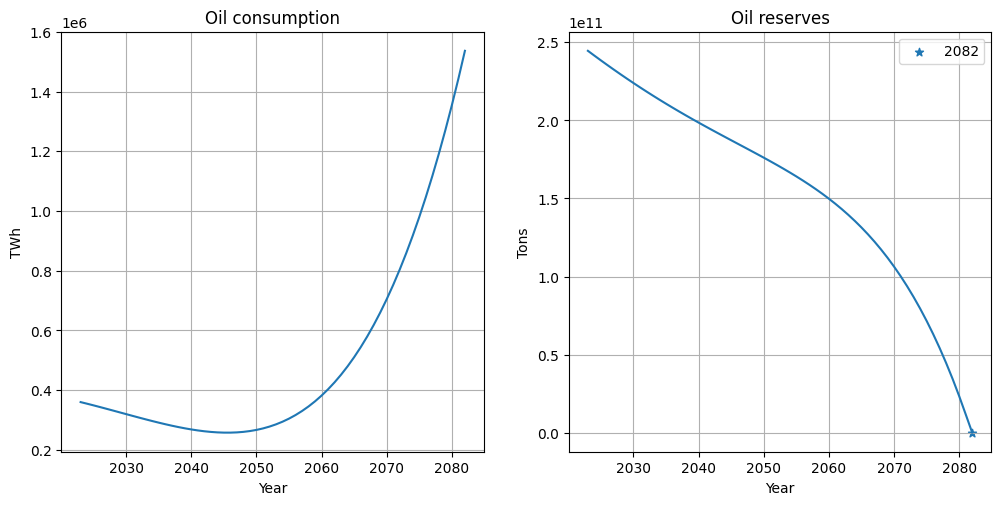

In [40]:
# Построение графика потребления и графика запасов нефти на земле
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(221)
ax1.set_title('Oil consumption')
ax1.set_xlabel('Year')
ax1.set_ylabel('TWh')
ax1.grid()
ax1.plot(np.arange(2023, 2023 + len(r_3)), py[:len(r_3)])

ax = fig.add_subplot(222)
ax.set_title('Oil reserves')
ax.set_xlabel('Year')
ax.set_ylabel('Tons')
ax.plot(np.arange(2023, 2023 + len(r_3)), r_3)
ax.scatter(2023 + len(r_3) - 1, 0, label=2023 + len(r_3) - 1, marker='*')
ax.grid()
ax.legend();

## Итог

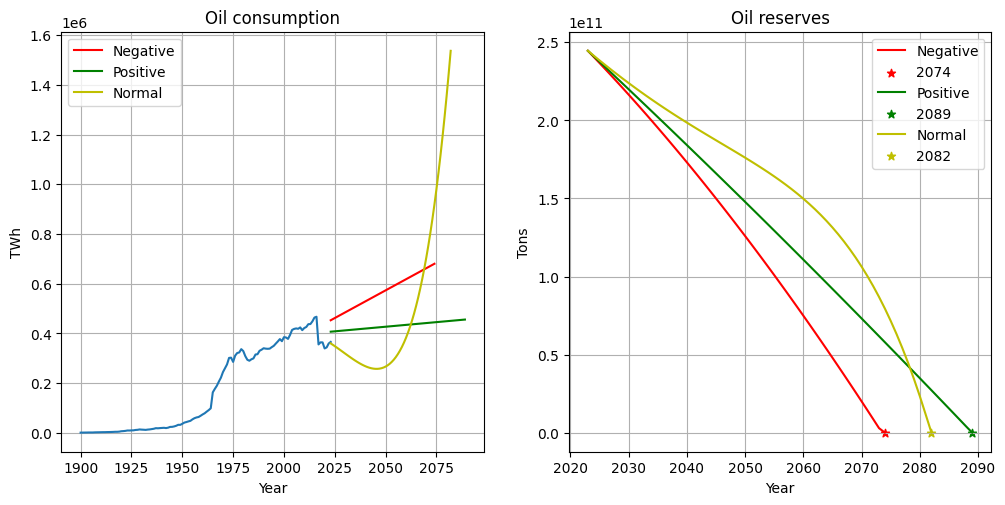

In [41]:
# Построим все три графика потребления и остатков нефти на одном графике
fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(221)
ax1.set_title('Oil consumption')
ax1.set_xlabel('Year')
ax1.set_ylabel('TWh')
ax1.grid()

ax1.plot(x, y)
ax1.plot(np.arange(2023, 2023 + len(r_1)), yp[:len(r_1)], 'r', label='Negative')
ax1.plot(np.arange(2023, 2023 + len(r_2)), yp2[:len(r_2)], 'g', \
         label='Positive')
ax1.plot(np.arange(2023, 2023 + len(r_3)), py[:len(r_3)], 'y', label='Normal')

ax = fig.add_subplot(222)
ax.set_title('Oil reserves')
ax.set_xlabel('Year')
ax.set_ylabel('Tons')

ax.plot(np.arange(2023, 2023 + len(r_1)), r_1, color='r', label='Negative')
ax.scatter(2023 + len(r_1) - 1, 0, label=2023 + len(r_1) - 1, marker='*', \
           color='r')

ax.plot(np.arange(2023, 2023 + len(r_2)), r_2, color='g', label='Positive')
ax.scatter(2023 + len(r_2) - 1, 0, label=2023 + len(r_2) - 1, marker='*', \
           color='g')

ax.plot(np.arange(2023, 2023 + len(r_3)), r_3, color='y', label='Normal')
ax.scatter(2023 + len(r_3) - 1, 0, label=2023 + len(r_3) - 1, marker='*', \
           color='y')

ax.grid()
ax1.legend()
ax.legend();